# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep:46     |  |
| :-------------|:-------------|
| Zahra Ramdane | 6533183|
| Hidde Van Den Bergh| 6576079 |
| Emma Van Der Grinten | 6404618 |

| Planning Groep: XX     |Tijdstip / Tijdspanne  |
| Sanity Check: 15m
| Toepassingen bedenken + criteria: 12:30
| Kaliberatie opstelling maken: 14
| Mijlpaal 2: Eerste kalibratie meting gedaan: 14.15
| Aanpassingen om geschikt te maken: 15h
| Pauze 2: 15.15
| Aanpassingen om geschikt te maken: 16h
| Inleveren: 16.30h

## *Opdracht 1*: Foto van alle schetsen.


![Alt](Hidde.jpeg "analyse: ideeen")
![Alt](emma.jpeg "analyse: ideeen")
![Alt](Zahradruksensor.jpeg "analyse: ideeen")




## *Opdracht 2*, MIJLPAAL, Leerdoel


| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Thermisotor | Brandmelder | Moet bij temperatuur van min. 50 graden Celcius meten en max. 100 graden Celcius   |
|Thermistor | Brandmelder | Sensor moet elke 2 seconden meten|
|
|Thermistor | Brandmelder| sensor moet op 0.5 graden Celsius kunnen meten.|
|Hall-sensor | ABS systeem | Verandering in magnetisch veld meten met frequenties van 840 RPM. |
|Hall-sensor | ABS systeem | Veranderingen in magnetisch veld constant is meten van 0.005 Tesla. |
|Hall-sensor | ABS systeem | Wanneer het magnetisch veld constantis voor meer dan 14 rotaties. Dan gaat een lampje branden.  |
|Druksensor | Toetsenbord | Kracht meten tussen 0.6 en 0.8 Newton |
|Druksensor | Toetsenbord | Meten met een nauwkeurigheid van 0.05 Newton |
|Druksensor | Toetsenbord | Meten met een frequentie van 10 Hz |


Groep 46 heeft gekozen voor druksensor toepassing


## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Ontwerp.jpeg "analyse: ideeen")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? We veranderen de kracht 𝐹 die op de druksensor wordt uitgeoefend. Dit doen we door verschillende massa’s op de sensor te plaatsen, waardoor de kracht verandert volgens 𝐹=𝑚⋅𝑔 (in Newton).

2. Over welk bereik ga je deze variabelen veranderen? We variëren de kracht van 0,06 N tot 0,80 N.

3. Wat ga je allemaal meten? We meten:

- De gebruikte massa (kg) waarmee de kracht wordt berekend.

- De bijbehorende kracht (N).

- De uitgangswaarde van de druksensor, bits.

4. Hoeveel metingen ga je doen? We verhogen de kracht in stappen van 0,05 N binnen het gekozen bereik. Dit levert ongeveer 15 meetpunten op.

5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja, met deze meetopzet kunnen we bepalen of de sensor binnen het gekozen krachtbereik nauwkeurig en betrouwbaar meet en of hij geschikt is voor de deze toepassing.


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Op de foto zijn twee verschillende meetopstellingen te zien.

Bij de eerste opstelling drukken we handmatig op een krachtmeter (veer), terwijl een vinger op de druksensor zit. Op deze manier proberen we de kracht te meten die op de sensor werkt. Deze methode geeft echter onduidelijke en wisselende meetwaarden, omdat de kracht niet constant wordt uitgeoefend.

Daarom bouwen we een tweede, verbeterde opstelling. Hierbij staat er een pootje op de druksensor met daarop een bekertje. In het bekertje doen we steeds iets meer water. Door meer water toe te voegen neemt de massa toe en daardoor wordt de kracht op de sensor groter. Om te weten hoeveel water hebben we een nauwkeurige weegschaal om het op te meten.


![Alt](krachtmeter.jpeg "analyse: ideeen")
![Alt](wateropstelling.jpeg "analyse: ideeen")



## *Opdracht 6*: Meten en fitten, Leerdoel

Formule: y = 80.34x + 92.56
Signaal sturen tussen ADC-waarde 173 en 334


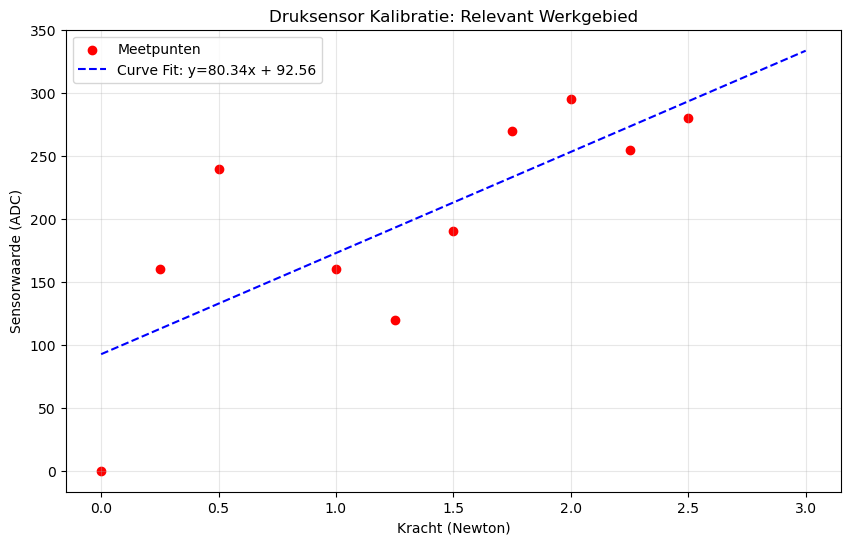

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1. Data invoeren
kracht_data = np.array([0, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) 
bits_data = np.array([0, 160, 240, 160, 120, 190, 270, 295, 255, 280]) 

# 2. Lineair model
def lineair_model(x, a, b):
    return a * x + b

# 3. Curve fit uitvoeren
popt, _ = curve_fit(lineair_model, kracht_data, bits_data)
a_fit, b_fit = popt

# 4. Berekeningen voor ADC-waarden (1N en 3N)
adc_1n = lineair_model(1, *popt)
adc_3n = lineair_model(3, *popt)

print(f"Formule: y = {a_fit:.2f}x + {b_fit:.2f}")
print(f"Signaal sturen tussen ADC-waarde {adc_1n:.0f} en {adc_3n:.0f}")

# 5. De plot maken
plt.figure(figsize=(10, 6))

# Meetpunten
plt.scatter(kracht_data, bits_data, color='red', label='Meetpunten')

# Fit-lijn tot 3 Newton
x_range = np.linspace(0, 3, 100) 
plt.plot(x_range, lineair_model(x_range, *popt), 'b--', 
         label=f'Curve Fit: y={a_fit:.2f}x + {b_fit:.2f}')


# Layout aanpassingen
plt.title('Druksensor Kalibratie: Relevant Werkgebied')
plt.xlabel('Kracht (Newton)')
plt.ylabel('Sensorwaarde (ADC)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


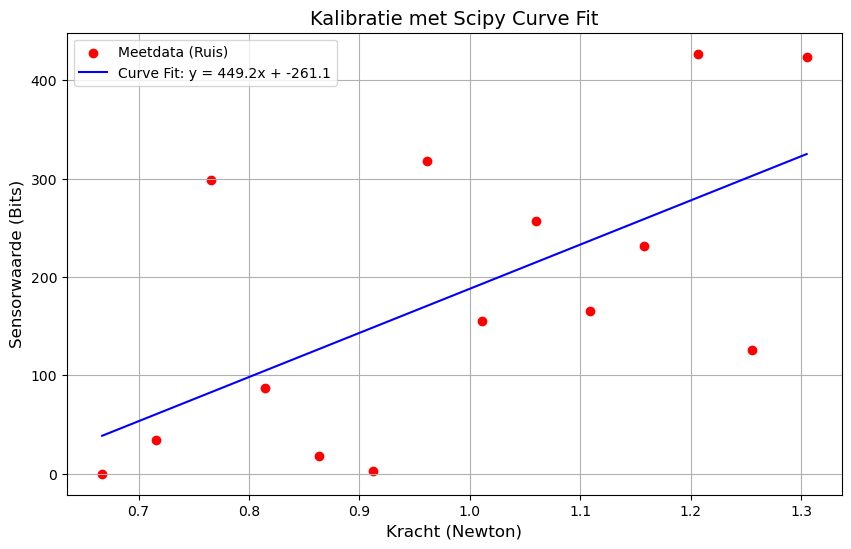

Gevonden helling (Gevoeligheid): 449.19 bits/Newton
Standaardfout in helling: 163.51


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. data (Massa in gram en Sensorwaarden in bits)
gram_data = np.array([68, 73, 78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133]) 
bits_data = np.array([0, 34, 299, 87, 18, 3, 318, 155, 257, 165, 232, 427, 126, 424])

# 2. Omrekenen naar Newton (F = m * g / 1000)
newton_data = (gram_data / 1000) * 9.81

# 3. Modelfunctie (Lineair: y = a*x + b) het liefst
def lineair_model(x, a, b):
    return a * x + b

# Curve fiy
# popt bevat de optimale parameters [a, b]
# pcov bevat de covariantie matrix (foutmarge)
popt, pcov = curve_fit(lineair_model, newton_data, bits_data)

# De gevonden waarden voor a (helling) en b (asafsnede)
a_fit, b_fit = popt
error_a = np.sqrt(pcov[0,0]) # Onzekerheid in de helling

# 5. Visualisatie
plt.figure(figsize=(10, 6))

plt.scatter(newton_data, bits_data, color='red', label='Meetdata (Ruis)')


x_range = np.linspace(min(newton_data), max(newton_data), 100)
y_fit = lineair_model(x_range, *popt)
plt.plot(x_range, y_fit, color='blue', label=f'Curve Fit: y = {a_fit:.1f}x + {b_fit:.1f}')

# Opmaak
plt.title('Kalibratie met Scipy Curve Fit', fontsize=14)
plt.xlabel('Kracht (Newton)', fontsize=12)
plt.ylabel('Sensorwaarde (Bits)', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

print(f"Gevonden helling (Gevoeligheid): {a_fit:.2f} bits/Newton")
print(f"Standaardfout in helling: {error_a:.2f}")


## *Opdracht 7*: Iteratie nodig?

Het viel op dat in de grafiek van de eerste meting (0 tot 1.3 N met de krachtmeter) heel veel schommeling te zien was. Bovendien lagen deze metingen niet binnen het specifieke bereik van de criteria voor een lichte toetsaanslag. Hierdoor werd de conclusie getrokken dat de eerste metingen te onduidelijk waren om een betrouwbare conclusie te trekken.
Om de nauwkeurigheid te vergroten, hebben we in de tweede ronde het meetbereik specifiek verkleind naar 0.6 tot 0.8 N. In plaats van de krachtmeter hebben we gewerkt met een bekertje water dat we steeds met exact 5 ml (wat overeenkomt met de gewenste stapgrootte van 0.05 N) vulden. Op deze manier wilden we een stabielere en meer gedetailleerde curve maken die precies aansluit op het criterium voor het corrigeren van de typ-snelheid.

## *Opdracht 8*: Conclusie, leerdoel

Uit de grafiek van de tweede meting blijkt dat de sensorwaardes op de y-as nog steeds erg fluctueren, ondanks de preciezere methode met water. Dit leidt tot de conclusie dat de huidige sensoropstelling niet geschikt is om het criterium te halen: het betrouwbaar sturen van een signaal bij een kracht tussen 0.6 N en 0.8 N met een stapgrootte van 0.05 N. De spreiding (ruis) in de gemeten bits is groter dan het verschil tussen de gewenste meetstappen van 0.05 N, waardoor de software geen nauwkeurig onderscheid kan maken tussen de verschillende drukniveaus.



## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

![Alt](Ontwerp.jpeg "analyse: ideeen")



### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

-Smartopstellen: 

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Thermisotor | Brandmelder | Moet bij temperatuur van min. 50 graden Celcius meten en max. 100 graden Celcius   |
|Thermistor | Brandmelder | Sensor moet elke 2 seconden meten|
|
|Thermistor | Brandmelder| sensor moet op 0.5 graden Celsius kunnen meten.|
|Hall-sensor | ABS systeem | Verandering in magnetisch veld meten met frequenties van 840 RPM. |
|Hall-sensor | ABS systeem | Veranderingen in magnetisch veld constant is meten van 0.005 Tesla. |
|Hall-sensor | ABS systeem | Wanneer het magnetisch veld constantis voor meer dan 14 rotaties. Dan gaat een lampje branden.  |
|Druksensor | Toetsenbord | Kracht meten tussen 0.6 en 0.8 Newton |
|Druksensor | Toetsenbord | Meten met een nauwkeurigheid van 0.05 Newton |
|Druksensor | Toetsenbord | Meten met een frequentie van minimaal 10 Hz |


- Ontwerpcyclus inrichten: 

1. Welke variabelen ga je veranderen? We veranderen de kracht 𝐹 die op de druksensor wordt uitgeoefend. Dit doen we door verschillende massa’s op de sensor te plaatsen, waardoor de kracht verandert volgens 𝐹=𝑚⋅𝑔 (in Newton).

2. Over welk bereik ga je deze variabelen veranderen? We variëren de kracht van 0,06 N tot 0,80 N.

3. Wat ga je allemaal meten? We meten:

- De gebruikte massa (kg) waarmee de kracht wordt berekend.

- De bijbehorende kracht (N).

- De uitgangswaarde van de druksensor, bits.

4. Hoeveel metingen ga je doen? We verhogen de kracht in stappen van 0,05 N binnen het gekozen bereik. Dit levert ongeveer 15 meetpunten op.

5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja, met deze meetopzet kunnen we bepalen of de sensor binnen het gekozen krachtbereik nauwkeurig en betrouwbaar meet en of hij geschikt is voor de deze toepassing.


### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Op de foto zijn twee verschillende meetopstellingen te zien.

Bij de eerste opstelling drukken we handmatig op een krachtmeter (veer), terwijl een vinger op de druksensor zit. Op deze manier proberen we de kracht te meten die op de sensor werkt. Deze methode geeft echter onduidelijke en wisselende meetwaarden, omdat de kracht niet constant wordt uitgeoefend.

Daarom bouwen we een tweede, verbeterde opstelling. Hierbij staat er een pootje op de druksensor met daarop een bekertje. In het bekertje doen we steeds iets meer water. Door meer water toe te voegen neemt de massa toe en daardoor wordt de kracht op de sensor groter. Om te weten hoeveel water hebben we een nauwkeurige weegschaal om het op te meten.

![Alt](krachtmeter.jpeg "analyse: ideeen")
![Alt](wateropstelling.jpeg "analyse: ideeen")





Formule: y = 80.34x + 92.56
Signaal sturen tussen ADC-waarde 173 en 334


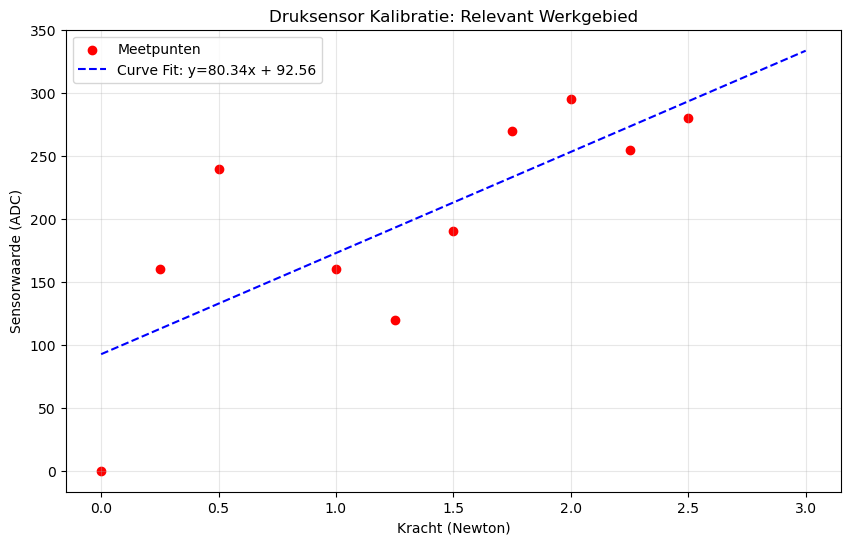

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1. Data invoeren
kracht_data = np.array([0, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]) 
bits_data = np.array([0, 160, 240, 160, 120, 190, 270, 295, 255, 280]) 

# 2. Lineair model
def lineair_model(x, a, b):
    return a * x + b

# 3. Curve fit uitvoeren
popt, _ = curve_fit(lineair_model, kracht_data, bits_data)
a_fit, b_fit = popt

# 4. Berekeningen voor ADC-waarden (1N en 3N)
adc_1n = lineair_model(1, *popt)
adc_3n = lineair_model(3, *popt)

print(f"Formule: y = {a_fit:.2f}x + {b_fit:.2f}")
print(f"Signaal sturen tussen ADC-waarde {adc_1n:.0f} en {adc_3n:.0f}")

# 5. De plot maken
plt.figure(figsize=(10, 6))

# Meetpunten
plt.scatter(kracht_data, bits_data, color='red', label='Meetpunten')

# Fit-lijn tot 3 Newton
x_range = np.linspace(0, 3, 100) 
plt.plot(x_range, lineair_model(x_range, *popt), 'b--', 
         label=f'Curve Fit: y={a_fit:.2f}x + {b_fit:.2f}')


# Layout aanpassingen
plt.title('Druksensor Kalibratie: Relevant Werkgebied')
plt.xlabel('Kracht (Newton)')
plt.ylabel('Sensorwaarde (ADC)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


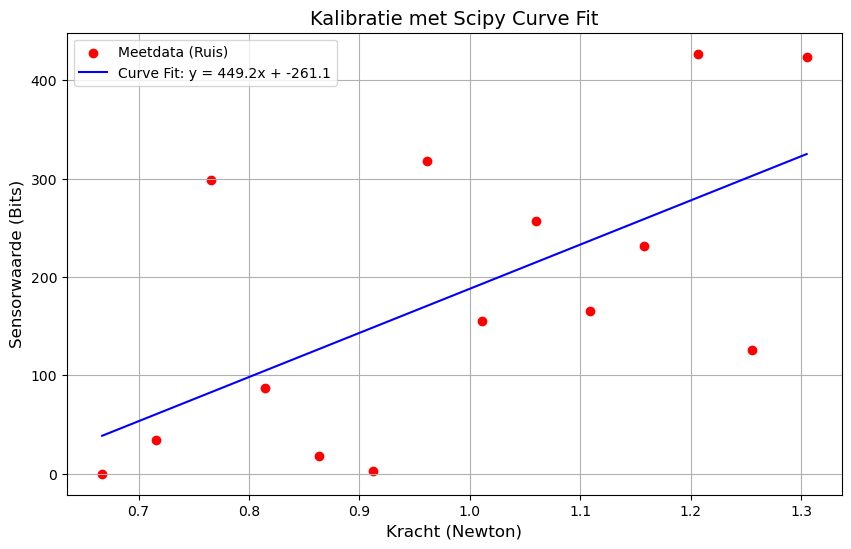

Gevonden helling (Gevoeligheid): 449.19 bits/Newton
Standaardfout in helling: 163.51


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. data (Massa in gram en Sensorwaarden in bits)
gram_data = np.array([68, 73, 78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 128, 133]) 
bits_data = np.array([0, 34, 299, 87, 18, 3, 318, 155, 257, 165, 232, 427, 126, 424])

# 2. Omrekenen naar Newton (F = m * g / 1000)
newton_data = (gram_data / 1000) * 9.81

# 3. Modelfunctie (Lineair: y = a*x + b) het liefst
def lineair_model(x, a, b):
    return a * x + b

# Curve fiy
# popt bevat de optimale parameters [a, b]
# pcov bevat de covariantie matrix (foutmarge)
popt, pcov = curve_fit(lineair_model, newton_data, bits_data)

# De gevonden waarden voor a (helling) en b (asafsnede)
a_fit, b_fit = popt
error_a = np.sqrt(pcov[0,0]) # Onzekerheid in de helling

# 5. Visualisatie
plt.figure(figsize=(10, 6))

plt.scatter(newton_data, bits_data, color='red', label='Meetdata (Ruis)')


x_range = np.linspace(min(newton_data), max(newton_data), 100)
y_fit = lineair_model(x_range, *popt)
plt.plot(x_range, y_fit, color='blue', label=f'Curve Fit: y = {a_fit:.1f}x + {b_fit:.1f}')

# Opmaak
plt.title('Kalibratie met Scipy Curve Fit', fontsize=14)
plt.xlabel('Kracht (Newton)', fontsize=12)
plt.ylabel('Sensorwaarde (Bits)', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

print(f"Gevonden helling (Gevoeligheid): {a_fit:.2f} bits/Newton")
print(f"Standaardfout in helling: {error_a:.2f}")


## *Opdracht 7*: Iteratie nodig?

Het viel op dat in de grafiek van de eerste meting (0 tot 1.3 N met de krachtmeter) heel veel schommeling te zien was. Bovendien lagen deze metingen niet binnen het specifieke bereik van de criteria voor een lichte toetsaanslag. Hierdoor werd de conclusie getrokken dat de eerste metingen te onduidelijk waren om een betrouwbare conclusie te trekken.
Om de nauwkeurigheid te vergroten, hebben we in de tweede ronde het meetbereik specifiek verkleind naar 0.6 tot 0.8 N. In plaats van de krachtmeter hebben we gewerkt met een bekertje water dat we steeds met exact 5 ml (wat overeenkomt met de gewenste stapgrootte van 0.05 N) vulden. Op deze manier wilden we een stabielere en meer gedetailleerde curve maken die precies aansluit op het criterium voor het corrigeren van de typ-snelheid.

## *Opdracht 8*: Conclusie
Uit de grafiek van de tweede meting blijkt dat de sensorwaardes op de y-as nog steeds erg fluctueren, ondanks de preciezere methode met water. Dit leidt tot de conclusie dat de huidige sensoropstelling niet geschikt is om het criterium te halen: het betrouwbaar sturen van een signaal bij een kracht tussen 0.6 N en 0.8 N met een stapgrootte van 0.05 N. De spreiding (ruis) in de gemeten bits is groter dan het verschil tussen de gewenste meetstappen van 0.05 N, waardoor de software geen nauwkeurig onderscheid kan maken tussen de verschillende drukniveaus.

